<a href="https://colab.research.google.com/github/Joaom123/huawei-hcia-ia-ifce/blob/main/RegressionExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Closed-form Linear Regression**

Let's start by generating some random linear data

In [ ]:
import numpy as np

np.random.seed(7)

X = 4*np.random.rand(200, 1)
y = 2 + 3*X + np.random.randn(200, 1)

Let's see what our data looks like


Text(0, 0.5, 'y')

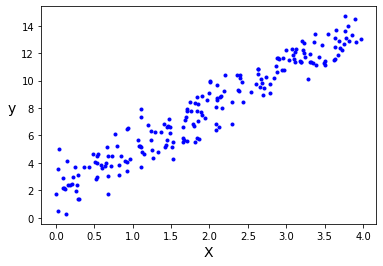

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.xlabel("X", fontsize=14)
plt.ylabel("y", rotation=0, fontsize=14, labelpad=10)

Now, let's see how well the Linear Regression models we saw fit this data.
We will start off building a Linear Regressor that uses the **Normal Equation** 

$\hat{\theta} = (X^TX)^{-1}X^Ty$

to find the best parameters.

In [ ]:
# First we will add x0 = 1 to each instance

Xb = np.c_[np.ones(X.shape), X]

# Now we compute the model parameters
theta = np.linalg.inv(Xb.T.dot(Xb)).dot(Xb.T).dot(y)
theta

array([[2.01777976],
       [2.97603138]])

That is a pretty good estimate! The function we used to generate our data was $y = 2 + 3x + noise$. The predicted function is $\hat{y} \approx 2.01 + 2.97x$. Not bad!

Text(0, 0.5, 'y')

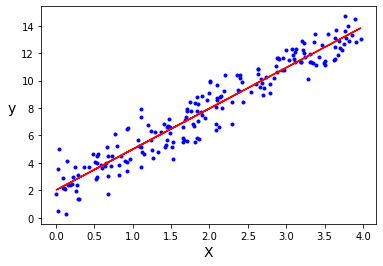

In [ ]:
y_pred = Xb.dot(theta)

plt.plot(X, y, 'b.')
plt.plot(X, y_pred, 'r-')
plt.xlabel("X", fontsize=14)
plt.ylabel("y", rotation=0, fontsize=14, labelpad=10)

Now let's perform the regression with scikit-learn.

In [ ]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X, y)

LR.intercept_, LR.coef_

(array([2.01777976]), array([[2.97603138]]))

Note that the solution is exactly the same. This happens because sklearn finds the best parameters solving the following equation

$\hat{\theta} = X^+ \theta$,

where $X^+$ is the [pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) of $X$. Evaluating the pseudinverse $X$ is more efficient than evaluating the inverse of $X^TX$. Besides, the pseuinverse is always defined while $X^TX$ might not be invertible.

## **Linear Regression with Gradient-Descent**


To perform Linear Regression with Gradient-Descent we will use sklearn's SGDRegressor.

In [ ]:
from sklearn.linear_model import SGDRegressor

SGD = SGDRegressor(max_iter=1000, tol=1e-6, eta0=0.01, penalty=None, random_state=7)
SGD.fit(X, np.ravel(y))

y_pred_SGD = SGD.predict(X)

SGD.intercept_, SGD.coef_

(array([1.93831671]), array([2.99402094]))

## **Ridge and Lasso Regression**

First we will perform **Ridge Regression** using the closed-form solution.

In [ ]:
from sklearn.linear_model import Ridge

RidgeLR = Ridge(solver='cholesky', alpha=0.01, random_state=7)
RidgeLR.fit(X, y)

y_pred_RidgeLR = RidgeLR.predict(X)

RidgeLR.intercept_, RidgeLR.coef_

(array([2.01800544]), array([[2.97591609]]))

Now using SGDRegressor.

In [ ]:
RidgeSGD = SGDRegressor(max_iter=1000, tol=1e-6, eta0=0.01, penalty='l2', alpha=0.01, random_state=7)
RidgeSGD.fit(X, np.ravel(y))

y_pred_RidgeSGD = RidgeSGD.predict(X)

RidgeSGD.intercept_, RidgeSGD.coef_

(array([1.97810841]), array([2.97261566]))

**Lasso Regression**

In [ ]:
LassoSGD = SGDRegressor(max_iter=10000, tol=1e-6, eta0=0.01, penalty='l1', alpha=0.01, random_state=7)
LassoSGD.fit(X, np.ravel(y))

y_pred_LassoSGD = LassoSGD.predict(X)

LassoSGD.intercept_, LassoSGD.coef_

(array([1.95152839]), array([2.98689907]))

## **Comparison**

Text(0.5, 1.0, 'SGD Lasso Regression')

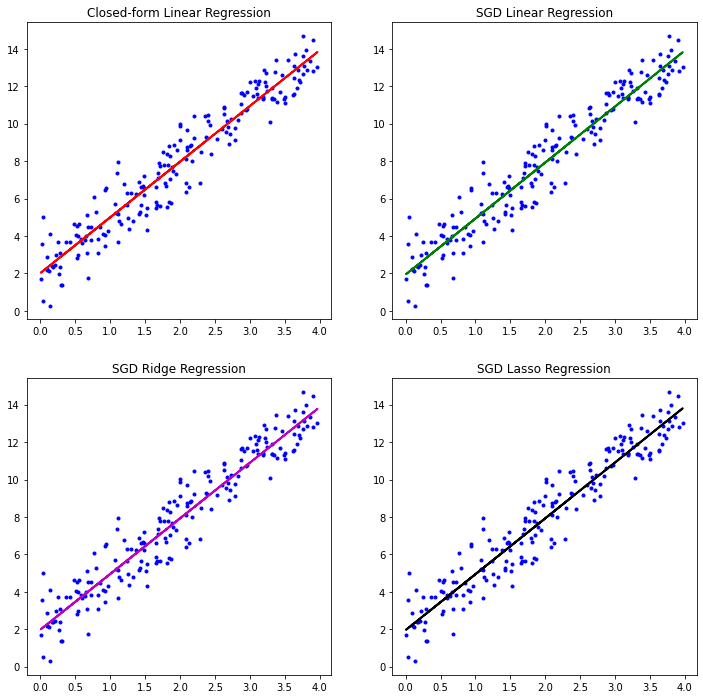

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(12,12))

for i in range(2):
  for j in range(2):
    axs[i, j].plot(X, y, 'b.')

axs[0, 0].plot(X, y_pred, 'r-', linewidth=2)
axs[0, 0].set_title("Closed-form Linear Regression")

axs[0, 1].plot(X, y_pred_SGD, 'g-', linewidth=2)
axs[0, 1].set_title("SGD Linear Regression")

axs[1, 0].plot(X, y_pred_RidgeSGD, 'm-', linewidth=2)
axs[1, 0].set_title("SGD Ridge Regression")

axs[1, 1].plot(X, y_pred_LassoSGD, 'k-', linewidth=2)
axs[1, 1].set_title("SGD Lasso Regression")

A common metric used to measure the performance of a regression model is the [r-squared](https://en.wikipedia.org/wiki/Coefficient_of_determination). It provides a measure of how well observed outcomes are replicated by the model.

In [ ]:
from sklearn.metrics import r2_score

print('Regression Model \t R2')
print('C-F Linear Regression: \t %2.4f'% r2_score(y, y_pred))
print('SGD Linear Regression: \t %2.4f'% r2_score(y, y_pred_SGD))
print('SGD Ridge Regression: \t %2.4f' % r2_score(y, y_pred_RidgeSGD))
print('SGD Lasso Regression: \t %2.4f' % r2_score(y, y_pred_LassoSGD))

Regression Model 	 R2
C-F Linear Regression: 	 0.9221
SGD Linear Regression: 	 0.9220
SGD Ridge Regression: 	 0.9220
SGD Lasso Regression: 	 0.9220


## **Polynomial Regression**

Finally, let's see how to perform **Polynomial Regression** with scikit-learn.

First we will generate some nonlinear data.

Text(0, 0.5, 'y')

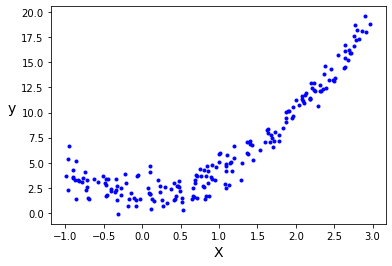

In [ ]:
np.random.seed(7)

X2 = 4*np.random.rand(200, 1) - 1
y2 = 2 + 2*X2**2 + np.random.randn(200, 1)

plt.plot(X2, y2, 'b.')
plt.xlabel("X", fontsize=14)
plt.ylabel("y", rotation=0, fontsize=14, labelpad=10)

Text(0, 0.5, 'y')

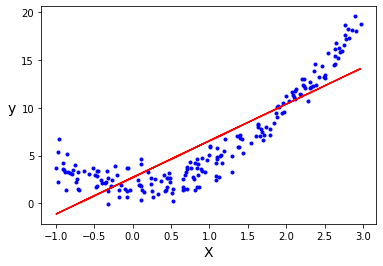

In [ ]:
LR = LinearRegression()
LR.fit(X2, y2)

y2_pred = LR.predict(X2)

plt.plot(X2, y2, 'b.')
plt.plot(X2, y2_pred, 'r-')
plt.xlabel("X", fontsize=14)
plt.ylabel("y", rotation=0, fontsize=14, labelpad=10)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
Xp = polyFeatures.fit_transform(X2)

print(X2.shape, Xp.shape)
Xp[0:3]

(200, 1) (200, 2)


array([[-0.69476684,  0.48270097],
       [ 2.11967517,  4.49302282],
       [ 0.75363693,  0.56796862]])

In [ ]:
PR = LinearRegression()
PR.fit(Xp, y2)

PR.intercept_, PR.coef_

(array([2.00116874]), array([[0.01558909, 1.97950862]]))

Text(0, 0.5, 'y')

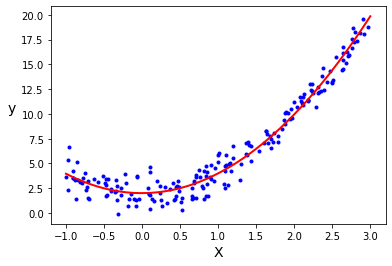

In [ ]:
Xn = np.linspace(-1, 3, 200).reshape(200, 1)
Xnp = polyFeatures.transform(Xn)
y2_pred_PR = PR.predict(Xnp)

plt.plot(X2, y2, 'b.')
plt.plot(Xn, y2_pred_PR, 'r-', linewidth=2)
plt.xlabel("X", fontsize=14)
plt.ylabel("y", rotation=0, fontsize=14, labelpad=10)